In [1]:
import pandas as pd
import numpy as np
import math
import folium
import branca
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import MarkerCluster

### Now that we have added the climate data into sparse SkiResort dataset we need to combine it with the udpated csv that I've been wokring on adding data into 

In [2]:
df1 = pd.read_excel('SkiResort_update_v03.xlsx',header=0)

# get rid of rows without information on adult fares
df1 = df1.dropna(subset=['adult day pass'])
df1.describe()

,annualSnowfall,lat,long,Avg. Snowfall,runCount,liftCount,longestRun,hourlyLiftCapacity,adult day pass,drop (m),summit (m)
count,38.000000,293.000000,293.000000,11.000000,257.000000,241.000000,99.000000,68.000000,293.000000,142.000000,120.000000
mean,727.097368,45.307459,-90.933949,599.765455,39.361868,6.589212,3315.952784,12113.044118,50.999231,442.668183,1402.155000
std,345.446938,4.035637,19.497687,361.183253,38.885115,4.961658,2846.976306,10912.469195,28.444750,370.924502,1026.496303
min,130.000000,35.124151,-128.953571,86.360000,2.000000,0.000000,2.300000,30.000000,0.000000,30.000000,137.000000
25%,448.250000,42.920418,-111.767979,320.040000,16.000000,3.000000,1355.000000,4575.000000,32.292400,180.250000,578.750000
50%,730.500000,44.932528,-81.115000,457.200000,24.000000,5.000000,2414.000000,8550.000000,48.000000,331.500000,1130.500000
75%,943.175000,47.982235,-75.024004,920.000000,45.000000,8.000000,4785.500000,15740.000000,67.640000,640.000000,2233.750000
max,1638.000000,55.868826,-54.046468,1173.480000,300.000000,38.000000,16415.308275,61407.000000,169.000000,2612.000000,6683.000000


In [3]:
df2 = pd.read_csv('temp_300.csv')
df2.head()

,annualSnowfall,created,georeferencing,hourlyLiftCapacity,lat,liftCount,long,longestRun,name,nightSkiing,...,1875_COLD,1879_COLD,1874_COLD,1880_COLD,1882_COLD,1876_COLD,1881_COLD,1877_COLD,1878_COLD,1873_COLD
0,NaN,2016-02-18T14:11:51+00:00,NaN,NaN,52.977947,NaN,-66.920940,NaN,Smokey Mountain Ski Club,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2018-01-01T20:31:10+00:00,NaN,NaN,53.523580,NaN,-64.020094,NaN,Northern Lights Ski Club,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2008-04-13T00:11:59+00:00,NaN,NaN,48.161777,NaN,-54.046468,NaN,White Hills,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2018-06-30T20:17:04+00:00,NaN,NaN,53.409742,2.0,-60.425457,NaN,Snow Goose Mountain (Mont Shana),Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,2008-04-13T00:11:59+00:00,NaN,NaN,48.936667,NaN,-57.827222,NaN,Marble Mountain,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
result = pd.merge(df1,df2,how='left',on=['name','name'])

In [5]:
temp = list(result)
cold_cols = [col for col in result.columns if '_COLD' in col]
result['AVG_GOODDAYS'] = result[cold_cols].sum(axis=1)/result['NYEAR']
# result['COLD_DAYS'] =  

In [6]:
result.to_csv('SkiResort_Combined_test.csv',index=False)

## Exploratory Data Analysis

Text(0, 0.5, 'Days')

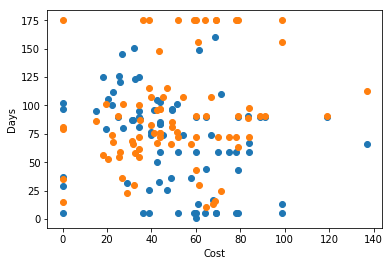

In [7]:
plt.plot(result['adult day pass'],result['2010_COLD'],'o')
plt.plot(result['adult day pass'],result['2010_HOT'],'o')
plt.xlabel('Cost')
plt.ylabel('Days')

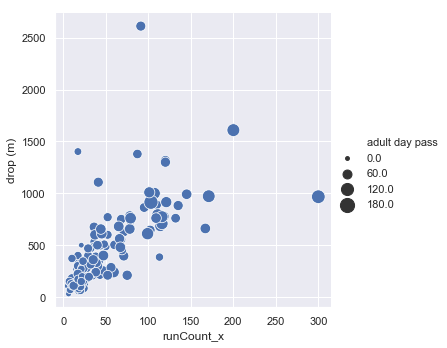

In [8]:
sns.set(style="darkgrid")
sns.relplot(x="runCount_x", y="drop (m)", size="adult day pass",sizes=(15,200), data=result);


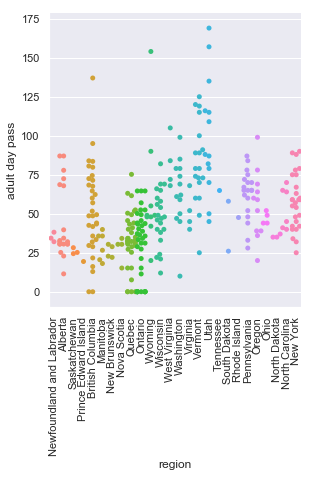

In [9]:
g = sns.catplot(x="region", y="adult day pass", kind="swarm", data=result);
g.set_xticklabels(rotation=90)


## Make a column of the ratio of cold days to total observations


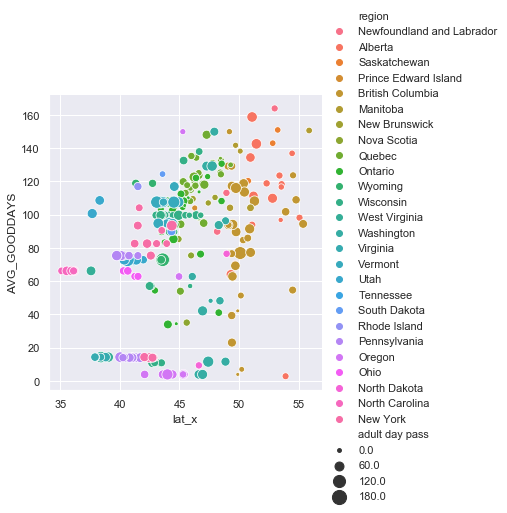

In [10]:
sns.relplot(x="lat_x", y="AVG_GOODDAYS", size="adult day pass",sizes=(15,200), hue='region', data=result);

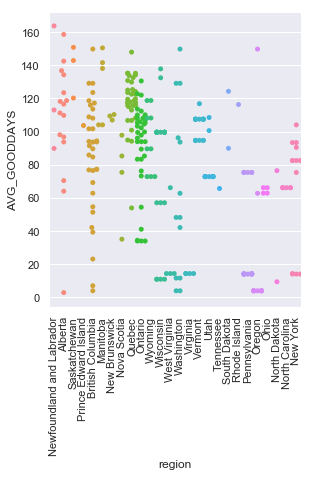

In [11]:
g = sns.catplot(x="region", y="AVG_GOODDAYS", kind="swarm", data=result);
g.set_xticklabels(rotation=90)

## Make some maps

In [60]:

#Import Library

#Load Data
lat = result['lat_x']
lon = result['long_x']
rate = result['adult day pass']

#Function to change colors
def color_change(elev):
    if(rate < 35):
        return('green')
    elif(35 <= rate <70):
        return('orange')
    else:
        return('red')

#Create base map
map = folium.Map(location=[37.296933,-121.9574983], zoom_start = 5, tiles = "CartoDB dark_matter")

#Plot Markers
for lat, lon, rate in zip(lat, lon, rate):
    folium.CircleMarker(location=[lat, lon], radius = 9, popup=str(rate)+" m", fill_color=color_change(rate), color="gray", fill_opacity = 0.9).add_to(map)
#Save the map
map

In [13]:
def fancy_html(row):
    
    Region = row['region']
    Date=row['name']
    NRuns=row['runCount_x']
    if math.isnan(NRuns):
        NRuns = 'Unknown'
    else:
        NRuns = str(int(NRuns))
#     Number_of_Casualties = row['Number_of_Casualties'].iloc[i]                           
#     Date = row['created_x']
#     Time = row['NYEAR']                                    
#     Light_Conditions = df['Light_Conditions'].iloc[i]                               
#     Weather_Conditions = df['Weather_Conditions'].iloc[i]      
#     Road_Surface_Conditions = df['Road_Surface_Conditions'].iloc[i]
    
    left_col_colour = "#2A799C"
    right_col_colour = "#C5DCE7"
    
    html = """<!DOCTYPE html>
<html>

<head>
<h4 style="margin-bottom:0"; width="300px">{}{}</h4>""".format(Date,", " + Region) + """

</head>
    <table style="height: 126px; width: 300px;">
<tbody>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">Region</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(Region) + """
</tr>
<tr>
<td style="background-color: """+ left_col_colour +""";"><span style="color: #ffffff;">No. Runs</span></td>
<td style="width: 200px;background-color: """+ right_col_colour +""";">{}</td>""".format(NRuns) + """
</tr>
</tbody>
</table>
</html>
"""
    return html

In [15]:
# m = folium.Map(location=[37.296933,-121.9574983], zoom_start = 5, tiles = "CartoDB dark_matter")

m = folium.Map(location=[42,-92], zoom_start = 4.2, tiles = "cartodbpositron")
cluster = MarkerCluster().add_to(m)

def color_change(elev):
    if(elev < 50):
        return('red')
    elif(1000 <= elev <100):
        return('orange')
    else:
        return('green')

for index, row in result.iterrows():
    html = fancy_html(row)
     
    if row['AVG_GOODDAYS'] < 100:
        colr='orange'
#         print('here')
    else:
        colr='green'
    iframe = branca.element.IFrame(html=html,width=400,height=300)
#     popup = folium.Popup(iframe,parse_html=True)
    
    folium.CircleMarker(location=[row['lat_x'], row['long_x']], radius = 9, fill_color=color_change(row['AVG_GOODDAYS']), color="gray", fill_opacity = 0.9).add_to(cluster)
m